In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
f_birth = pd.read_csv('data/daily-total-female-births-CA.csv', parse_dates=[0], index_col=0)

In [3]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [4]:
# get distribution and trends of the data

In [5]:
bb = f_birth.values

In [6]:
bb

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [7]:
type(bb)

numpy.ndarray

In [8]:
f_birth.size

365

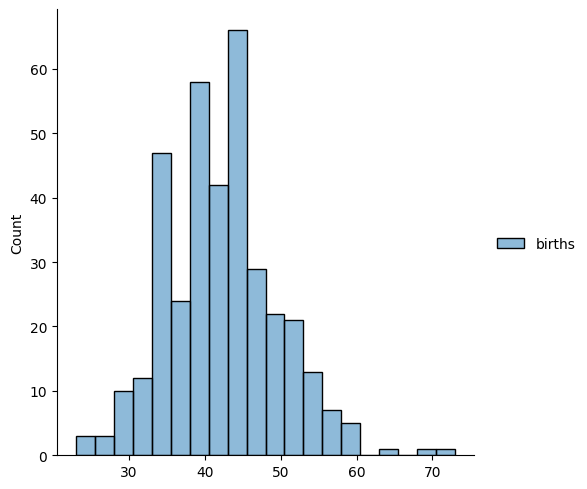

In [9]:
sns.displot(f_birth)

<Axes: xlabel='date'>

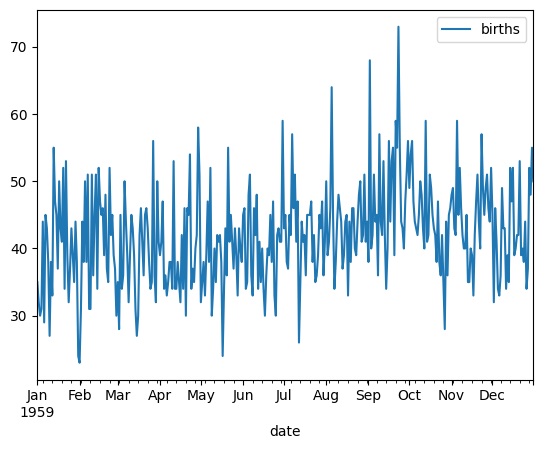

In [10]:
f_birth.plot()

In [11]:
# this is very close to stationery, which the data has no trend (has constant mean and std)

In [12]:
# use rolling on the data

In [13]:
f_birth.describe().T

,count,mean,std,min,25%,50%,75%,max
births,365.0,41.980822,7.348257,23.0,37.0,42.0,46.0,73.0


In [14]:
f_birth_mean = f_birth.births.rolling(window=20).mean()

<Axes: xlabel='date'>

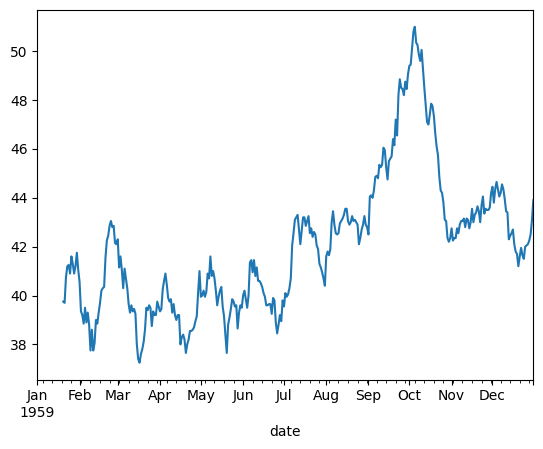

In [15]:
f_birth_mean.plot()

In [16]:
# approach 1: do prediction using baseline model (recent history is the best prediction for tomorrow)

In [17]:
value = f_birth.births

In [18]:
forecast = f_birth.births.shift(1)

In [19]:
birth_df = pd.concat([value, forecast], axis=1)

In [20]:
birth_df

,births,births
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
...,...,...
1959-12-27,37,34.0
1959-12-28,52,37.0
1959-12-29,48,52.0


In [21]:
birth_df.columns = ['actual', 'forecasted']

In [22]:
birth_df

,actual,forecasted
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
...,...,...
1959-12-27,37,34.0
1959-12-28,52,37.0
1959-12-29,48,52.0


In [23]:
# evaluate the accuracy of the model

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
np.sqrt(mean_squared_error(birth_df.actual[1:], birth_df.forecasted[1:]))

np.float64(9.177283229394606)

In [28]:
# approach 2: apply arima on the data

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

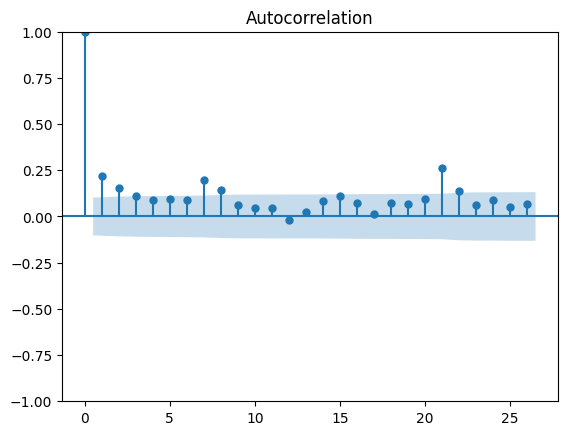

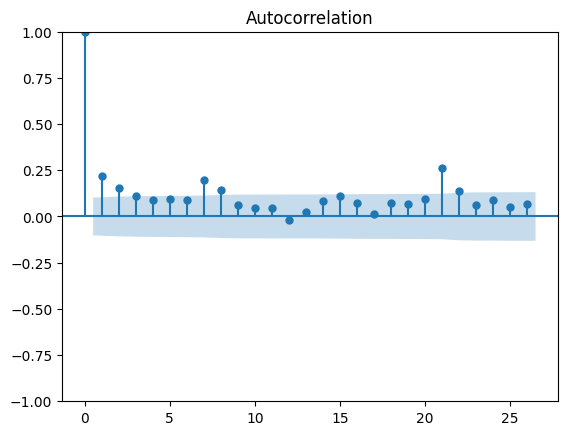

In [30]:
plot_acf(f_birth.births)

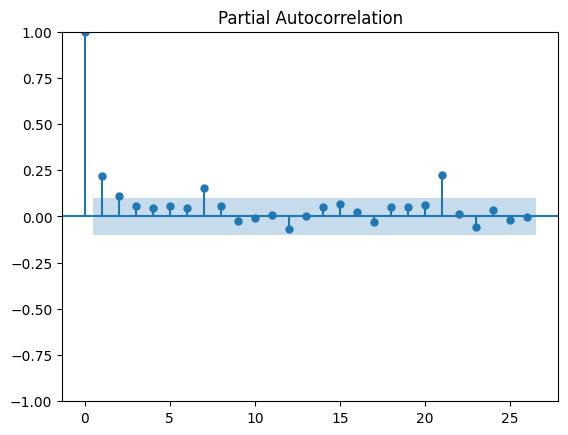

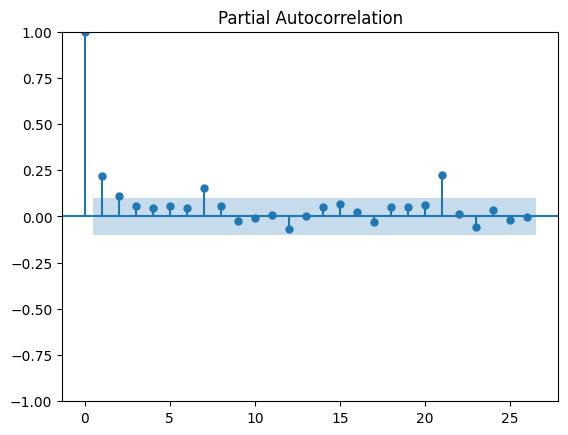

In [31]:
plot_pacf(f_birth)

In [32]:
train = f_birth[0:320]
test = f_birth[320:]

In [33]:
arima = ARIMA(train, order=(2, 1, 3))

c:\Users\modern14\VSCode\GitHub\my-portfolio\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\modern14\VSCode\GitHub\my-portfolio\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\modern14\VSCode\GitHub\my-portfolio\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [34]:
model=arima.fit()

In [35]:
model.aic

np.float64(2167.8472399068633)

In [36]:
pred = model.forecast(steps=45)

In [37]:
pred

1959-11-17    42.860639
1959-11-18    43.279106
1959-11-19    43.447916
1959-11-20    43.526927
1959-11-21    43.555955
1959-11-22    43.571614
1959-11-23    43.576066
1959-11-24    43.579509
1959-11-25    43.579920
1959-11-26    43.580825
1959-11-27    43.580709
1959-11-28    43.581006
1959-11-29    43.580895
1959-11-30    43.581010
1959-12-01    43.580948
1959-12-02    43.580998
1959-12-03    43.580966
1959-12-04    43.580990
1959-12-05    43.580974
1959-12-06    43.580985
1959-12-07    43.580978
1959-12-08    43.580983
1959-12-09    43.580979
1959-12-10    43.580982
1959-12-11    43.580980
1959-12-12    43.580981
1959-12-13    43.580980
1959-12-14    43.580981
1959-12-15    43.580981
1959-12-16    43.580981
1959-12-17    43.580981
1959-12-18    43.580981
1959-12-19    43.580981
1959-12-20    43.580981
1959-12-21    43.580981
1959-12-22    43.580981
1959-12-23    43.580981
1959-12-24    43.580981
1959-12-25    43.580981
1959-12-26    43.580981
1959-12-27    43.580981
1959-12-28    43

In [38]:
np.sqrt(mean_squared_error(test, pred))

np.float64(6.53664505268369)

In [39]:
# approach 3: normalize the data

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
birth_normalized = scaler.fit_transform(f_birth)

In [43]:
birth_normalized

array([[0.24],
       [0.18],
       [0.14],
       [0.16],
       [0.42],
       [0.12],
       [0.44],
       [0.4 ],
       [0.3 ],
       [0.08],
       [0.3 ],
       [0.2 ],
       [0.64],
       [0.48],
       [0.44],
       [0.28],
       [0.54],
       [0.4 ],
       [0.36],
       [0.58],
       [0.22],
       [0.6 ],
       [0.32],
       [0.18],
       [0.28],
       [0.4 ],
       [0.32],
       [0.24],
       [0.42],
       [0.3 ],
       [0.02],
       [0.  ],
       [0.16],
       [0.42],
       [0.3 ],
       [0.54],
       [0.3 ],
       [0.56],
       [0.16],
       [0.16],
       [0.56],
       [0.26],
       [0.44],
       [0.56],
       [0.22],
       [0.58],
       [0.48],
       [0.44],
       [0.46],
       [0.32],
       [0.5 ],
       [0.28],
       [0.24],
       [0.58],
       [0.38],
       [0.44],
       [0.32],
       [0.28],
       [0.14],
       [0.24],
       [0.1 ],
       [0.44],
       [0.22],
       [0.26],
       [0.54],
       [0.42],
       [0.

In [44]:
birth_normalized.size

365

In [45]:
train = birth_normalized[0:320]
test = birth_normalized[320:]

In [46]:
test.size

45

In [47]:
arima = ARIMA(train, order=(2, 1, 3))

In [48]:
model = arima.fit()

In [49]:
model.aic

np.float64(-328.02576356708477)

In [50]:
pred2 = model.forecast(steps=45)

In [51]:
pred2

array([0.39702103, 0.40547282, 0.40879643, 0.41058233, 0.41115542,
       0.41156765, 0.41163833, 0.4117501 , 0.41174239, 0.41177994,
       0.41176736, 0.41178268, 0.41177455, 0.4117816 , 0.41177712,
       0.41178057, 0.41177822, 0.41177995, 0.41177873, 0.41177961,
       0.41177899, 0.41177943, 0.41177912, 0.41177934, 0.41177918,
       0.4117793 , 0.41177921, 0.41177927, 0.41177923, 0.41177926,
       0.41177924, 0.41177925, 0.41177924, 0.41177925, 0.41177925,
       0.41177925, 0.41177925, 0.41177925, 0.41177925, 0.41177925,
       0.41177925, 0.41177925, 0.41177925, 0.41177925, 0.41177925])

In [52]:
np.sqrt(mean_squared_error(test,pred2))

np.float64(0.1307266109464464)

In [53]:
actual_forecast = scaler.inverse_transform(pred2.reshape(-1,1))

In [54]:
actual_forecast

array([[42.85105172],
       [43.2736408 ],
       [43.43982135],
       [43.52911655],
       [43.5577711 ],
       [43.57838252],
       [43.5819167 ],
       [43.58750523],
       [43.58711926],
       [43.58899717],
       [43.58836803],
       [43.5891338 ],
       [43.58872752],
       [43.58908019],
       [43.58885609],
       [43.58902848],
       [43.58891084],
       [43.5889973 ],
       [43.58893664],
       [43.58898044],
       [43.58894937],
       [43.58897166],
       [43.58895578],
       [43.58896714],
       [43.58895904],
       [43.58896483],
       [43.58896069],
       [43.58896365],
       [43.58896154],
       [43.58896304],
       [43.58896197],
       [43.58896274],
       [43.58896219],
       [43.58896258],
       [43.5889623 ],
       [43.5889625 ],
       [43.58896236],
       [43.58896246],
       [43.58896239],
       [43.58896244],
       [43.5889624 ],
       [43.58896243],
       [43.58896241],
       [43.58896242],
       [43.58896241]])

In [55]:
np.sqrt(mean_squared_error(scaler.inverse_transform(test),actual_forecast))

np.float64(6.536330547322319)

In [56]:
# approach 3 resulted less error

In [57]:
# doing basic feature engineering on the data

In [58]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [59]:
f_birth['lag1'] = f_birth.births.shift(1)
f_birth['lag2'] = f_birth.births.shift(2)
f_birth['lag3'] = f_birth.births.shift(3)

In [60]:
f_birth.head()

,births,lag1,lag2,lag3
date,,,,
1959-01-01,35,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN
1959-01-03,30,32.0,35.0,NaN
1959-01-04,31,30.0,32.0,35.0
1959-01-05,44,31.0,30.0,32.0


In [61]:
# moving average

In [62]:
f_birth['MA3'] = f_birth.births.rolling(window=3).mean()

In [63]:
f_birth['MA4'] = f_birth.births.rolling(window=4).mean()

In [64]:
f_birth['MAX5'] = f_birth.births.rolling(window=5).max()

In [65]:
f_birth['MIN5'] = f_birth.births.rolling(window=5).min()

In [66]:
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MAX5,MIN5
date,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,44.0,30.0


In [67]:
f_birth['Date'] = f_birth.index.day
f_birth['Month'] = f_birth.index.month
f_birth['Year'] = f_birth.index.year

In [68]:
f_birth.dropna(inplace=True)

In [69]:
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MAX5,MIN5,Date,Month,Year
date,,,,,,,,,,,
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,44.0,30.0,5,1,1959
1959-01-06,29,44.0,31.0,30.0,34.666667,33.50,44.0,29.0,6,1,1959
1959-01-07,45,29.0,44.0,31.0,39.333333,37.25,45.0,29.0,7,1,1959
1959-01-08,43,45.0,29.0,44.0,39.000000,40.25,45.0,29.0,8,1,1959
1959-01-09,38,43.0,45.0,29.0,42.000000,38.75,45.0,29.0,9,1,1959


In [70]:
# stationery time series testing

In [71]:
# approach 1: plot data

<Axes: xlabel='date'>

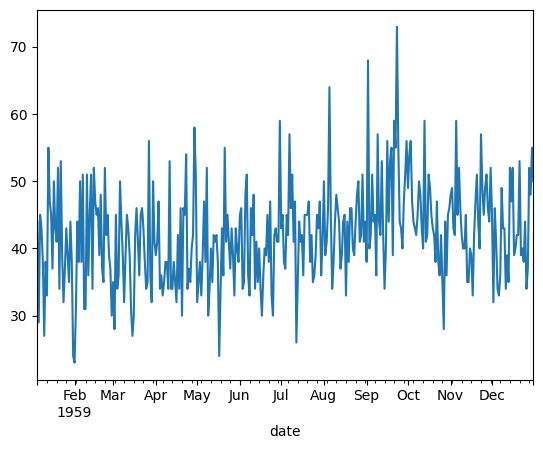

In [72]:
f_birth.births.plot()

<Axes: >

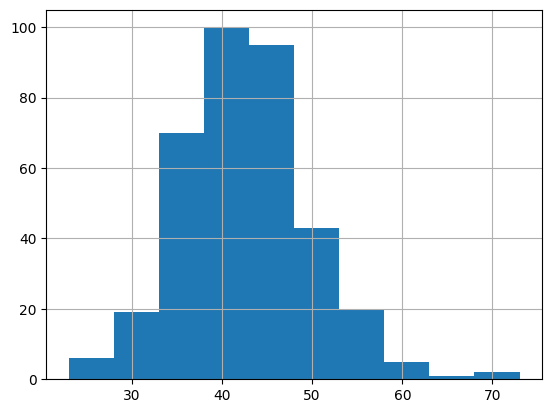

In [73]:
f_birth['births'].hist()

In [74]:
# looks normal but skewed a little to the right side

In [75]:
# approach 2: applying dickey fuller test on data

In [76]:
f_birth1 = f_birth[0:201]
f_birth2 = f_birth[201:]

In [77]:
f_birth1.births.mean()

np.float64(40.19402985074627)

In [78]:
f_birth2.births.mean()

np.float64(44.475)

In [79]:
# the means should be the same, but here they are not

In [80]:
f_birth1.births.var()

np.float64(48.33716417910448)

In [81]:
f_birth2.births.var()

np.float64(49.92389937106918)

In [82]:
# approach 3: applying augmented dickey fuller

In [83]:
from statsmodels.tsa.stattools import adfuller

In [84]:
adfuller(f_birth.births)

(np.float64(-4.832187684149896),
 np.float64(4.717774659887324e-05),
 6,
 354,
 {'1%': np.float64(-3.4489583388155194),
  '5%': np.float64(-2.869739378430086),
  '10%': np.float64(-2.5711381780459)},
 np.float64(2315.0067430524587))

In [85]:
def adfuller_test(col):
  res = adfuller(col)

  labels = ['ADF', 'p-value', 'lags used', 'no of obs used']

  for value,label in zip(res,labels):
    print('{} : {}'.format(label,value))
  if res[1] <= 0.05:
    print('strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary')
  else:
    print('weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary')

In [86]:
adfuller_test(f_birth.births)

ADF : -4.832187684149896
p-value : 4.717774659887324e-05
lags used : 6
no of obs used : 354
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [87]:
# hypertune the time series

In [88]:
f_birth = pd.read_csv('data/daily-total-female-births-CA.csv', parse_dates=[0], index_col=0)

In [89]:
p_values = range(0,8)
d_values = range(0,3)
q_values = range(0,5)

In [90]:
for p in p_values:
  for d in d_values:
    for q in q_values:
      order = (p,d,q)
      print(order)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(0, 2, 4)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 0, 4)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
(1, 2, 4)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 0, 3)
(2, 0, 4)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(2, 2, 0)
(2, 2, 1)
(2, 2, 2)
(2, 2, 3)
(2, 2, 4)
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)
(3, 0, 3)
(3, 0, 4)
(3, 1, 0)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(3, 2, 0)
(3, 2, 1)
(3, 2, 2)
(3, 2, 3)
(3, 2, 4)
(4, 0, 0)
(4, 0, 1)
(4, 0, 2)
(4, 0, 3)
(4, 0, 4)
(4, 1, 0)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)
(4, 2, 0)
(4, 2, 1)
(4, 2, 2)
(4, 2, 3)
(4, 2, 4)
(5, 0, 0)
(5, 0, 1)
(5, 0, 2)
(5, 0, 3)
(5, 0, 4)
(5, 1, 0)
(5, 1, 1)
(5, 1, 2)
(5, 1, 3)
(5, 1, 4)
(5, 2, 0)
(5, 2, 1)
(5, 2, 2)
(5, 2, 3)
(5, 2, 4)
(6, 0, 0)
(6, 0, 1)
(6, 0, 2)
(6, 0, 3)
(6, 0, 4)
(6, 1, 0)
(6, 1, 1)
(6, 1, 2)
(6, 1, 3)
(6, 1, 4)


In [91]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [92]:
f_birth.shape

(365, 1)

In [93]:
q_values

range(0, 5)

In [94]:
### so we are just trying to provide pairs of (p,d,q) & whichever pair will give me least error i will consider that pair,
mse = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train = np.array(f_birth[0:300])
            test = np.array(f_birth[300:])
            # print(test.shape)
            ### now we have train & test data that we can pass to our algorithm
            
            
            arima = ARIMA(train ,order=order)
            model = arima.fit()
            pred_y = model.forecast(steps=len(test))
            # print(pred_y)
            # predictions.append(pred_y)

            error = mean_squared_error(test, pred_y)
            print('MSE is {} with order {}'.format(error,order))

            mse.append(error)

MSE is 43.668628093414355 with order (0, 0, 0)
MSE is 43.93084386159538 with order (0, 0, 1)
MSE is 43.88346350364058 with order (0, 0, 2)
MSE is 43.94858696708155 with order (0, 0, 3)
MSE is 44.11233183692637 with order (0, 0, 4)
MSE is 283.5538461538463 with order (0, 1, 0)
MSE is 39.85228743776637 with order (0, 1, 1)
MSE is 39.89254846844763 with order (0, 1, 2)
MSE is 39.914559085058855 with order (0, 1, 3)
MSE is 39.91284871031578 with order (0, 1, 4)
MSE is 78042.4615384615 with order (0, 2, 0)
MSE is 308.3880020232079 with order (0, 2, 1)
MSE is 39.97676300343742 with order (0, 2, 2)
MSE is 42.715342621856514 with order (0, 2, 3)
MSE is 43.997883586267506 with order (0, 2, 4)
MSE is 43.986651527604295 with order (1, 0, 0)
MSE is 45.9693077917383 with order (1, 0, 1)
MSE is 43.45878064973635 with order (1, 0, 2)
MSE is 42.63746057952532 with order (1, 0, 3)
MSE is 43.465260577921576 with order (1, 0, 4)
MSE is 218.72158704281165 with order (1, 1, 0)
MSE is 39.922063264453165 wit

In [95]:
min(mse)

39.58771050423453

In [96]:
# MSE is 39.55995091258294 with order (5, 1, 4) -> this is the lowest/best params